In [163]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

df = pd.read_csv('nasa asteroid dataset.csv')

df.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


In [165]:
# Data quality check

print(df.info())
print(df.isnull().sum())

# Dropping irrelevant columns

df = df.drop(columns=['Close Approach Date','Orbit Determination Date','Orbiting Body', 'Equinox'])

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Close Approach Date           4687 non-null   object 
 12  Epoch Date Close Approach     4687 non-null   int64  
 13  Rel

In [167]:
# Select only numerical columns (excluding 'Hazardous')
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Scale numerical columns
scaler = StandardScaler()
df_scaled = df.copy()  # Keep original DataFrame structure
df_scaled[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Now 'Hazardous' remains unchanged
print(df_scaled.head())


   Neo Reference ID      Name  Absolute Magnitude  Est Dia in KM(min)  \
0          0.785321  0.785321           -0.231042           -0.209411   
1          0.823377  0.823377           -0.334824           -0.158406   
2         -1.504780 -1.504780           -0.680766            0.072789   
3         -0.327763 -0.327763            1.775418           -0.529864   
4          0.442083  0.442083           -0.231042           -0.209411   

   Est Dia in KM(max)  Est Dia in M(min)  Est Dia in M(max)  \
0           -0.209411          -0.209411          -0.209411   
1           -0.158406          -0.158406          -0.158406   
2            0.072789           0.072789           0.072789   
3           -0.529864          -0.529864          -0.529864   
4           -0.209411          -0.209411          -0.209411   

   Est Dia in Miles(min)  Est Dia in Miles(max)  Est Dia in Feet(min)  ...  \
0              -0.209411              -0.209411             -0.209411  ...   
1              -0.158406  

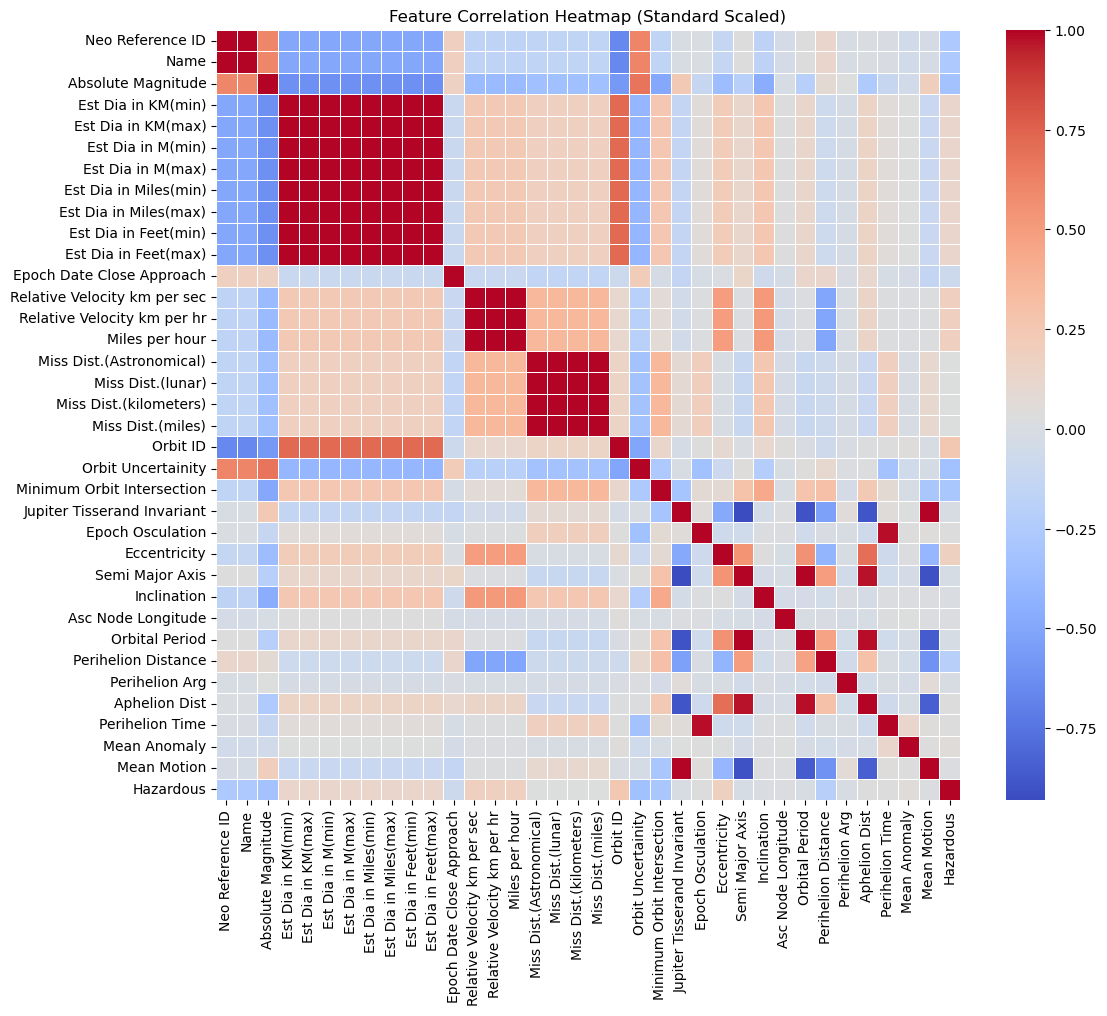

In [169]:
# Correlation heatmap
correlation_matrix_scaled = df_scaled.corr()

# Plotting
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_scaled, cmap="coolwarm", annot=False, fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap (Standard Scaled)")
plt.show()

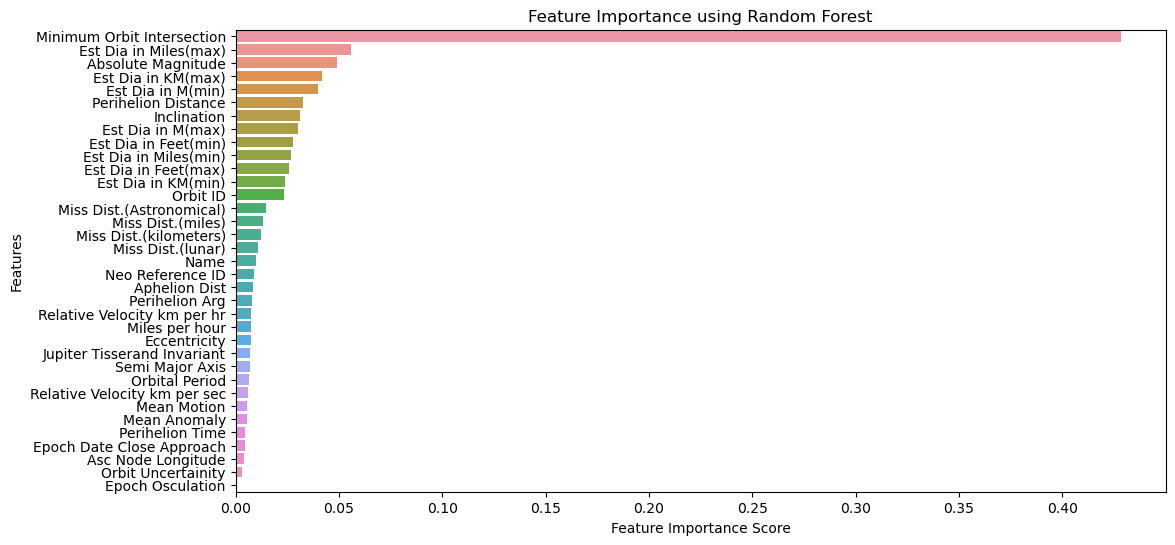

In [173]:
# Feature Importance using Random Forest
X = df_scaled.drop('Hazardous',axis=1)
y = df_scaled["Hazardous"]

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)
importances = rf.feature_importances_
feature_importance = pd.Series(importances, index=X.columns).sort_values(ascending=False)

# Plot Feature Importance
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance using Random Forest")
plt.show()


Accuracy : 1.00


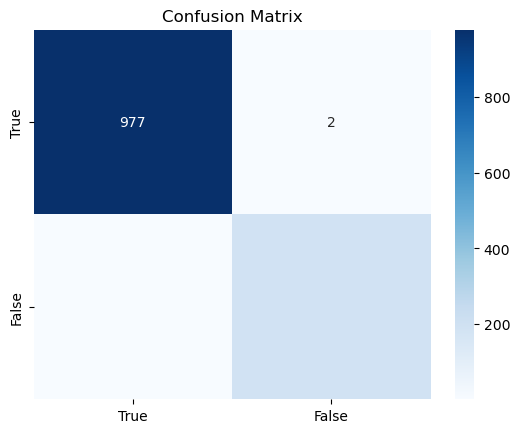

In [175]:
X = df_scaled.drop('Hazardous',axis=1)
y = df_scaled["Hazardous"]
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Splitting further into train and test sets
X_train,X_test ,y_train,y_test = train_test_split(X,y,test_size=0.25)

# Predictive model training
model = RandomForestClassifier()
model.fit(X_train,y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test,y_pred)
print(f'Accuracy : {accuracy:.2f}')

# Confusion matrix
conf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues',xticklabels=y.unique(),yticklabels=y.unique())

plt.title('Confusion Matrix')
plt.show()